# 3. Análisis Exploratorio de Series Temporales


## 3.1 Importación de modulos de Python a usar

Durante este capítulo se usarán los siguientes módulos:

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm

In [3]:
import warnings
warnings.filterwarnings('ignore')

## 3.2 Lectura del dataset

Se usa pandas para leer el dataset modificado en el capitulo anterior y almacenarlo en un objeto DataFrame que nos permita su manipulación con más facilidad.

In [4]:
path = '../Data/'

df = pd.read_csv(path + 'hour.csv', delimiter=',')
processed_df = pd.read_csv(path + 'hour-processed.csv', delimiter=',')

## 3.3 Analisis de estacionalidad

## 3.3.1 Estacionalidad horaria

El uso de bicicletas a lo largo del día muestra 2 picos, que coinciden con las horas que determinamos como pico:
* 7 - 9 a.m.: el cual es el horario donde las personas normalmente van a trabajar, al colegio, dejar a sus hijos a la escuela, etc.
* 5 - 7 p.m.: horario de retorno a los hogares de las personas.

Por otro lado, encontramos un valle entre las 1 a.m. y las 5 a.m., horario donde el uso es mínimo debido a que las personas están descansando en sus hogares.

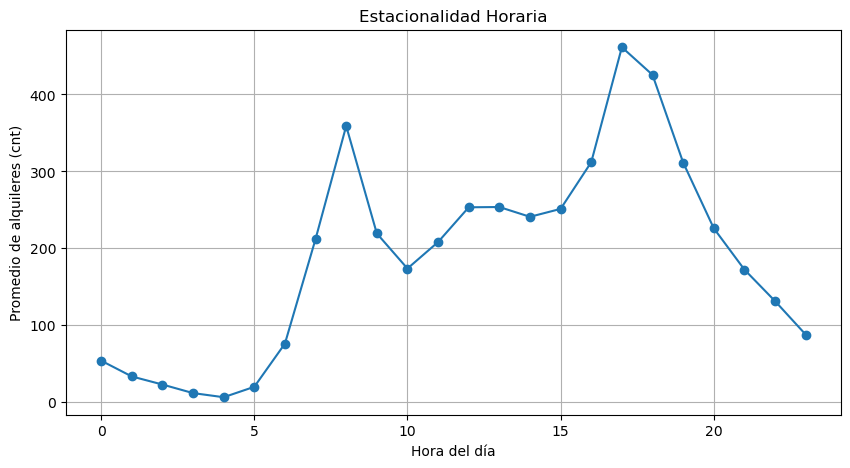

In [5]:
hourly = df.groupby("hr")["cnt"].mean()

plt.figure(figsize=(10, 5))
plt.plot(hourly.index, hourly.values, marker="o")
plt.title("Estacionalidad Horaria")
plt.xlabel("Hora del día")
plt.ylabel("Promedio de alquileres (cnt)")
plt.grid(True)
plt.show()

Podemos hacer una agrupación adicional entre días laborales y no laborales, para ver si estos patrones se mantienen en esos días. Aquí observamos que el patrón inicial se mantiene fuertemente en estos días, lo cual tiene sentido ya que estos días son mñas comunes por lo cual marcarán la tendencia.

En días no laborales, los picos se mergen en uno solo y se desplazan hacia mediodía. Esto indica que los días no laborales, la gente sale en bicicleta en el periodo de las 11 a.m. hasta las 4 p.m..

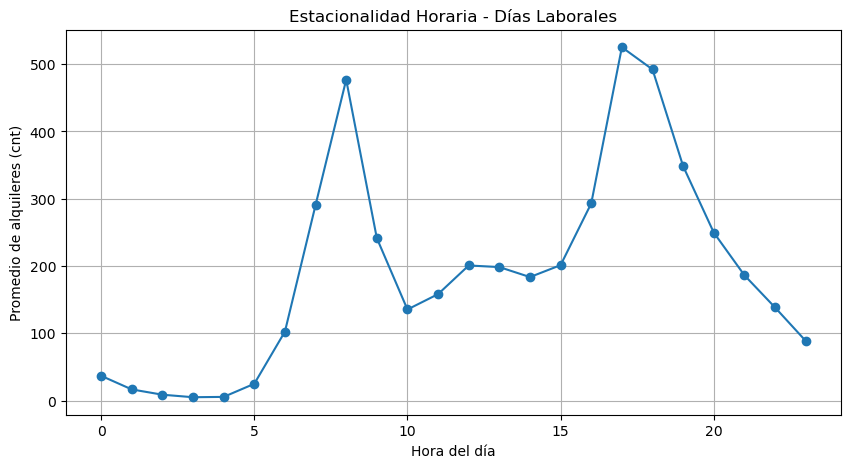

In [13]:
hourly_working = df[df['workingday']==1].groupby("hr")["cnt"].mean()

plt.figure(figsize=(10, 5))
plt.plot(hourly_working.index, hourly_working.values, marker="o")
plt.title("Estacionalidad Horaria - Días Laborales")
plt.xlabel("Hora del día")
plt.ylabel("Promedio de alquileres (cnt)")
plt.grid(True)
plt.show()

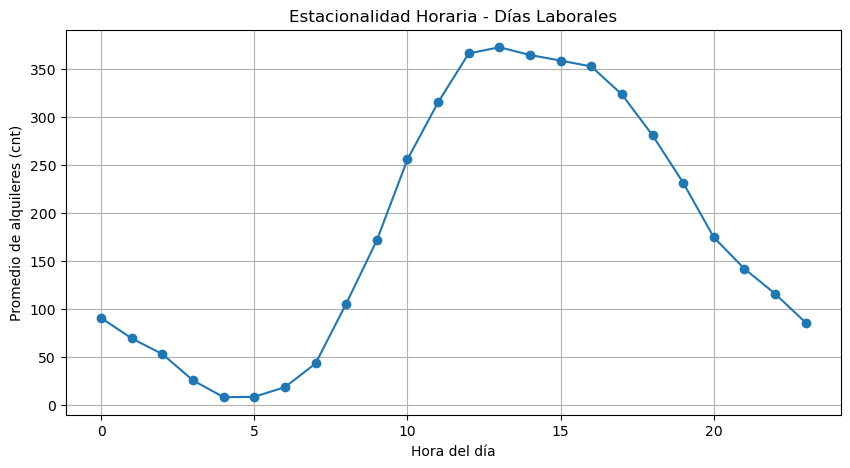

In [14]:
hourly_working = df[df['workingday']==0].groupby("hr")["cnt"].mean()

plt.figure(figsize=(10, 5))
plt.plot(hourly_working.index, hourly_working.values, marker="o")
plt.title("Estacionalidad Horaria - Días Laborales")
plt.xlabel("Hora del día")
plt.ylabel("Promedio de alquileres (cnt)")
plt.grid(True)
plt.show()

## 3.3.2 Estacionalidad diaria

Al analizar la estacionalidad diaria, observamos que la demanda es mínima los domingos (día 0). Encontramos que entre martes y sábado, la demanda es más estable, con aumento de consumo entre jueves y viernes.

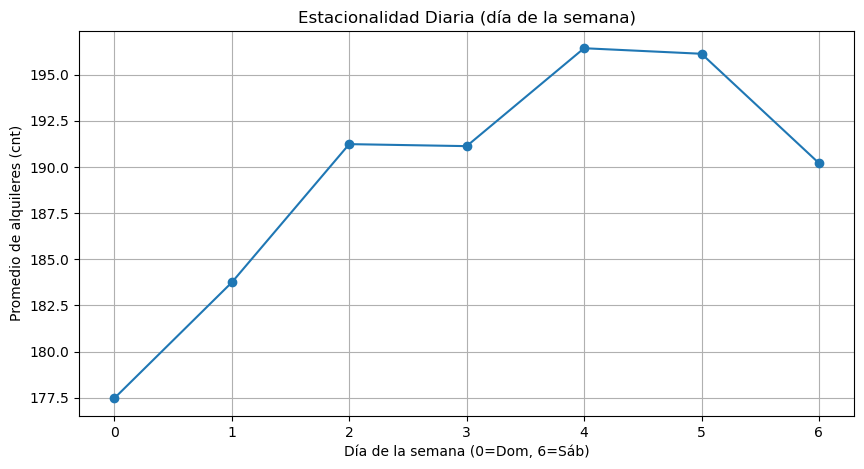

In [6]:
daily = df.groupby("weekday")["cnt"].mean()

plt.figure(figsize=(10, 5))
plt.plot(daily.index, daily.values, marker="o")
plt.title("Estacionalidad Diaria (día de la semana)")
plt.xlabel("Día de la semana (0=Dom, 6=Sáb)")
plt.ylabel("Promedio de alquileres (cnt)")
plt.grid(True)
plt.show()

## 3.3.3 Heatmap: Hora vs Día

Podemos generar para combinar las visualizar las estacionalidades diarias y horarias. Podemos observar los picos en días laborales (1 a 5) en color amararillo. En cambio, sábados y domingos muestran sus picos alrededor del medio día.

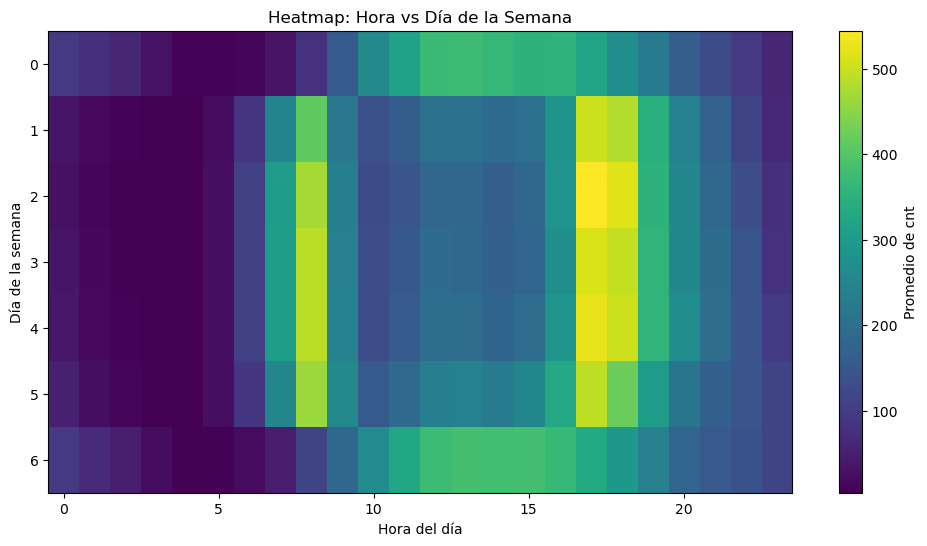

In [9]:
pivot = df.pivot_table(values="cnt", index="weekday", columns="hr", aggfunc="mean")

plt.figure(figsize=(12, 6))
plt.imshow(pivot, aspect="auto")
plt.colorbar(label="Promedio de cnt")
plt.title("Heatmap: Hora vs Día de la Semana")
plt.xlabel("Hora del día")
plt.ylabel("Día de la semana")
plt.show()

## 3.3.4 Estacionalidad mensual

En la estacionalidad mensual, vemos  un patrón donde los meses de mayor uso son los más calidos del año en el hemisferio norte: De mayo a octubre.

A medida que se entra en invierno y primavera, que son los meses más fríos del año, la demanda disminuye debido a la incomodidad causada for el frío, la nieve, disminución en visibilidad, etc.

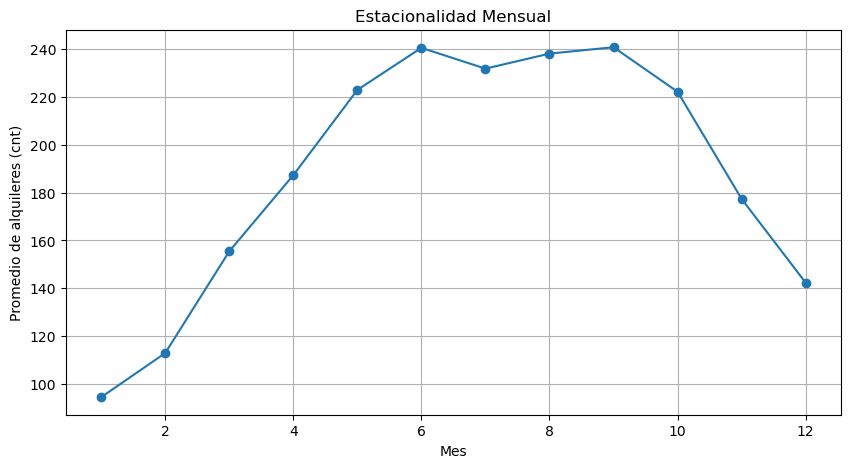

In [8]:
monthly = df.groupby("mnth")["cnt"].mean()

plt.figure(figsize=(10, 5))
plt.plot(monthly.index, monthly.values, marker="o")
plt.title("Estacionalidad Mensual")
plt.xlabel("Mes")
plt.ylabel("Promedio de alquileres (cnt)")
plt.grid(True)
plt.show()

Este patrón es aún más notorio si lo comparamos con el promedio de temperatura mensual. Vemos gráficas muy similares, que presentan valles y picos alrededor de los mismos meses. 

Aunque en este patrón, se evidencia una excepción, donde en el punto de máxima temperatura hay una ligera disminución en el uso de bicicletas. Esto indica que en días muy cálidos, el efecto puede ser opuesto y descentivar el uso de bicicleta debido a las altas temperaturas.

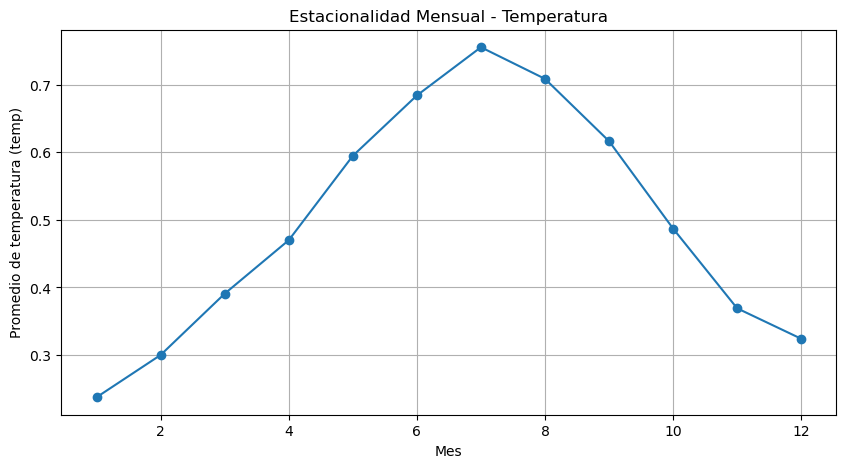

In [16]:
monthly_temp = df.groupby("mnth")["temp"].mean()

plt.figure(figsize=(10, 5))
plt.plot(monthly_temp.index, monthly_temp.values, marker="o")
plt.title("Estacionalidad Mensual - Temperatura")
plt.xlabel("Mes")
plt.ylabel("Promedio de temperatura (temp)")
plt.grid(True)
plt.show()

## 3.3.5 Boxplots

Finalmente, gráficamos boxplots para cada estacionalidad, donde evidenciamos la presencia de outliers.

En estacionalidad horaria, estos outliers se evidencian principalmente en horas valle.

<Figure size 1400x600 with 0 Axes>

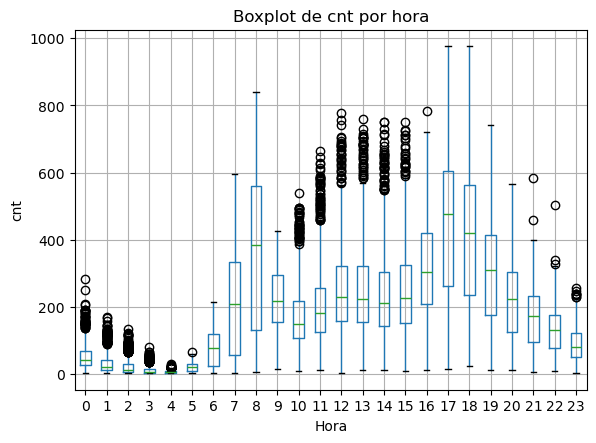

In [10]:
# Boxplot por hora
plt.figure(figsize=(14, 6))
df.boxplot(column="cnt", by="hr")
plt.title("Boxplot de cnt por hora")
plt.suptitle("")
plt.xlabel("Hora")
plt.ylabel("cnt")
plt.show()

En cambio, al trasladar el analisis a lo largo de los días de la semana, la presencia de outliers ocurre principalmente en días laborales. Notamos también cierto sesgo hacia la derecha, y que los outliers superiores tienden a afectar mñas el promedio que los inferiores.

<Figure size 1400x600 with 0 Axes>

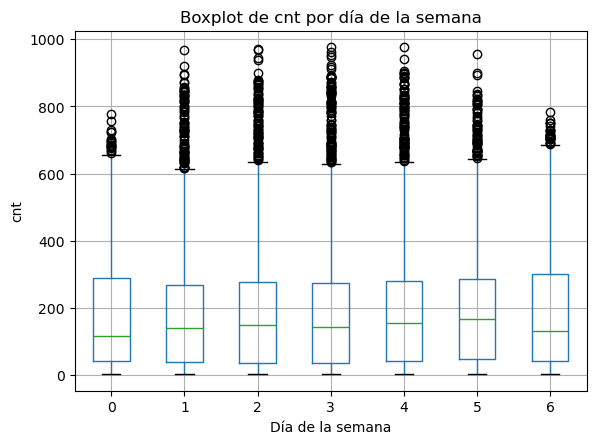

In [11]:
# Boxplot por día
plt.figure(figsize=(14, 6))
df.boxplot(column="cnt", by="weekday")
plt.title("Boxplot de cnt por día de la semana")
plt.suptitle("")
plt.xlabel("Día de la semana")
plt.ylabel("cnt")
plt.show()

A lo largo del año, la presencia de outliers se evidencia constante a lo largo de los meses.

<Figure size 1400x600 with 0 Axes>

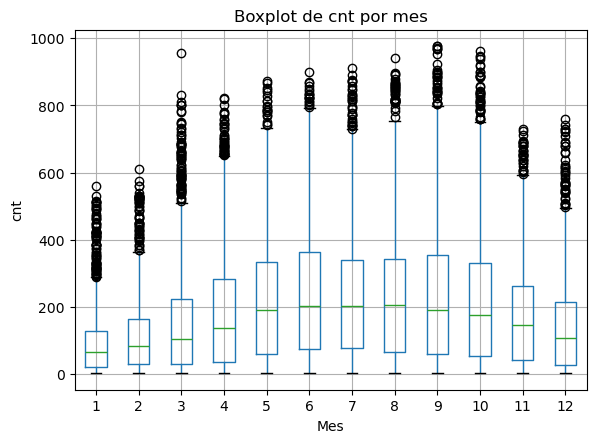

In [12]:
# Boxplot por mes
plt.figure(figsize=(14, 6))
df.boxplot(column="cnt", by="mnth")
plt.title("Boxplot de cnt por mes")
plt.suptitle("")
plt.xlabel("Mes")
plt.ylabel("cnt")
plt.show()

## 3.4 Patrones de uso de usuarios casual y registered

### 3.4.1 Estacionalidad horaria

Al incluir la diferenciación entre casual y registered en nuestro análisis, notamos que los usuarios registrados siguen un patrón similar al patrón de días laborales, mientras que los usuarios casuales siguen un patrón similar al patrón de días no laborales.

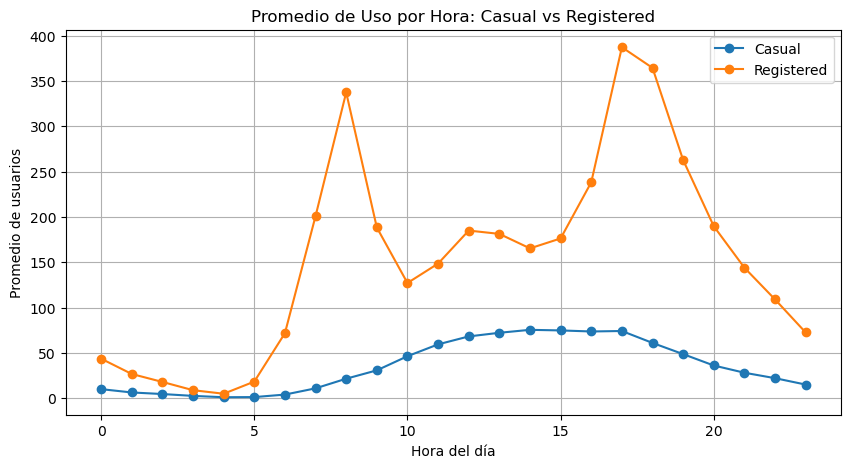

In [17]:
hourly = df.groupby("hr")[["casual", "registered"]].mean()

plt.figure(figsize=(10,5))
plt.plot(hourly.index, hourly["casual"], marker="o", label="Casual")
plt.plot(hourly.index, hourly["registered"], marker="o", label="Registered")

plt.title("Promedio de Uso por Hora: Casual vs Registered")
plt.xlabel("Hora del día")
plt.ylabel("Promedio de usuarios")
plt.legend()
plt.grid(True)
plt.show()

## 3.4.2 Estacionalidad diaria

Lo anterior es reforzado todavía más, cuando observamos el uso a lo largo de los días de la semana y notamos un patrón inverso: 

Mientras los usuarios registrados incrementan de lunes a viernes y disminuyen los fines de semana, los usuarios casuales aumentan los fines de semana y disminuyen los días laborales.

Todo esto indica un usario registrado lo hará porque requiere un uso diario de las bicicletas para ir al trabajo, universidades, etc. , mientras que usuarios casuales, tenderán a usar las bicicletas de forma recreativa.

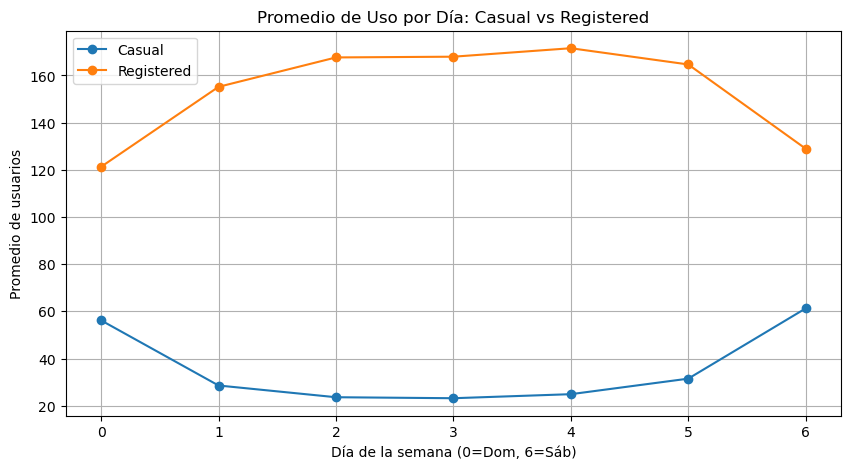

In [18]:
daily = df.groupby("weekday")[["casual", "registered"]].mean()

plt.figure(figsize=(10,5))
plt.plot(daily.index, daily["casual"], marker="o", label="Casual")
plt.plot(daily.index, daily["registered"], marker="o", label="Registered")

plt.title("Promedio de Uso por Día: Casual vs Registered")
plt.xlabel("Día de la semana (0=Dom, 6=Sáb)")
plt.ylabel("Promedio de usuarios")
plt.legend()
plt.grid(True)
plt.show()

## 3.4.3 Estacialidad mensual

La estacionalidad mensual es similar entre ambos tipos de usuarios, picos en meses cálidos y valles en meses fríos.

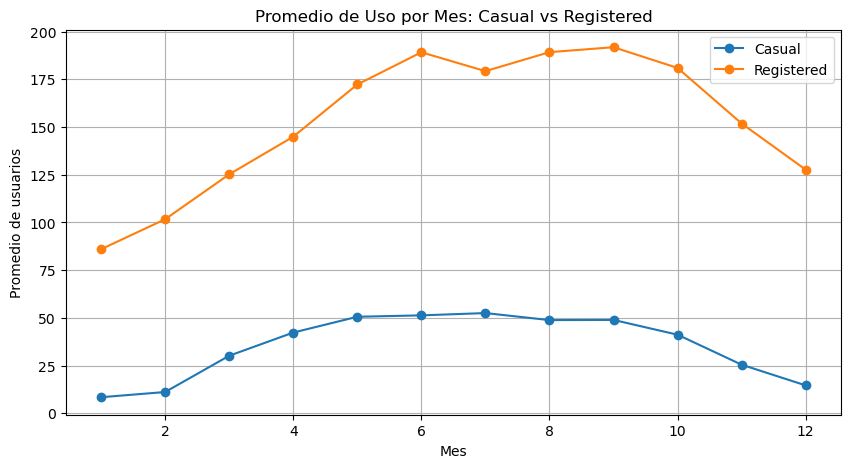

In [19]:
monthly = df.groupby("mnth")[["casual", "registered"]].mean()

plt.figure(figsize=(10,5))
plt.plot(monthly.index, monthly["casual"], marker="o", label="Casual")
plt.plot(monthly.index, monthly["registered"], marker="o", label="Registered")

plt.title("Promedio de Uso por Mes: Casual vs Registered")
plt.xlabel("Mes")
plt.ylabel("Promedio de usuarios")
plt.legend()
plt.grid(True)
plt.show()

# 3.5 Influencia del clima

## 3.5.1 Correlación entre variables climaticas y uso de bicicletas

Primero, realizamos un heatmap con el factor de correlación entre las variables *temp*, *atemp*, *hum* y *windspeed*. De aquí, sacamos las siguientes conclusiones:

* La temperatura (*temp*) y la sensación térmica (*atemp*) son las variables más correlacionadas con la cantidad de usuarios, especialmente los casuales.
* La humedad (*hum*) tiene una correlación negativa, es decir, que a mayor humedad, menos usuarios.
* La influencia de la velocidad del viento (*windspeed*) parece ser nula o poco significante.
* Los usuarios registrados parecen verse menos afectados por factores climáticos que los casuales.

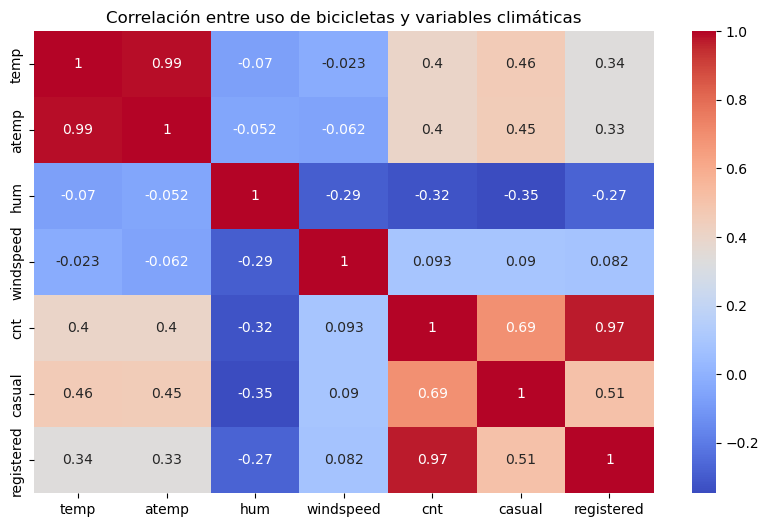

In [20]:
climate_vars = ["temp", "atemp", "hum", "windspeed"]
target_vars = ["cnt", "casual", "registered"]

corr = df[climate_vars + target_vars].corr()

plt.figure(figsize=(10,6))
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Correlación entre uso de bicicletas y variables climáticas")
plt.show()

## 3.5.2 Relación entre temperatura y número de usuarios

Realizamos un scatter plot, para visualizar mejor el efecto de la temperatura. Notamos el patrón ya mencianado de que a temperatura más altas, parece incrementar el número de usuarios.

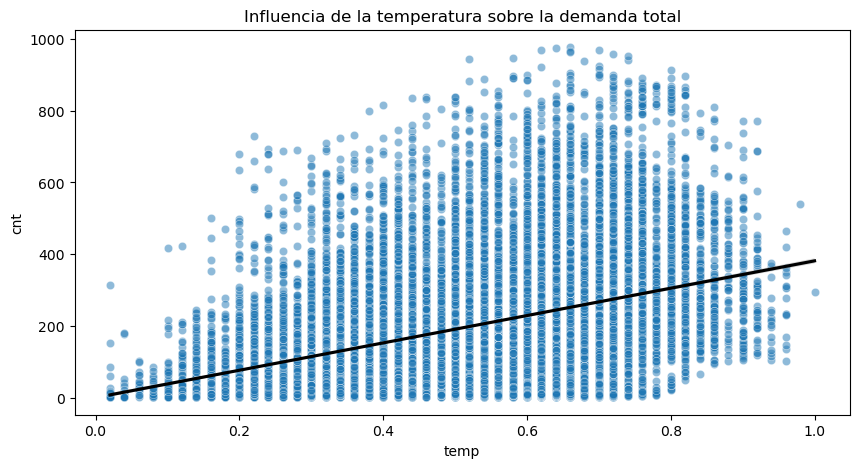

In [21]:
plt.figure(figsize=(10,5))
sns.scatterplot(data=df, x="temp", y="cnt", alpha=0.5)
sns.regplot(data=df, x="temp", y="cnt", scatter=False, color="black")
plt.title("Influencia de la temperatura sobre la demanda total")
plt.show()

Este patrón se envidencia incluso entre casuales y registrados, como se puede observar en la siguiente gráfica.

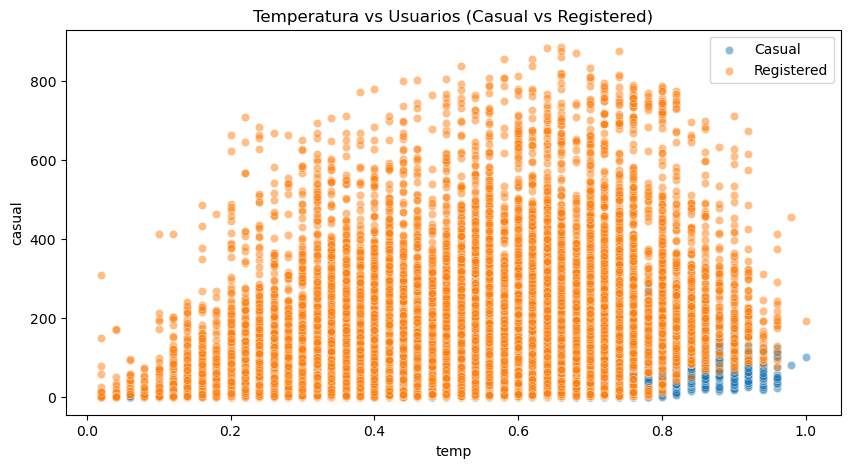

In [22]:
plt.figure(figsize=(10,5))
sns.scatterplot(data=df, x="temp", y="casual", alpha=0.5, label="Casual")
sns.scatterplot(data=df, x="temp", y="registered", alpha=0.5, label="Registered")
plt.title("Temperatura vs Usuarios (Casual vs Registered)")
plt.legend()
plt.show()

## 3.5.3 Efecto de la humedad

Realizamos el mismo análisis para la humedad, donde se evidencia la ligera correlación negativa que hay entre la humedad y el número de usuarios. Apreciamos algo que se notó también con la temperatura, y es que aunque existe correlación, la disperción es muy grande. Esto puede indicar que estás variables por si solas no captán gran parte de la variabilidad de las variables objetivos.

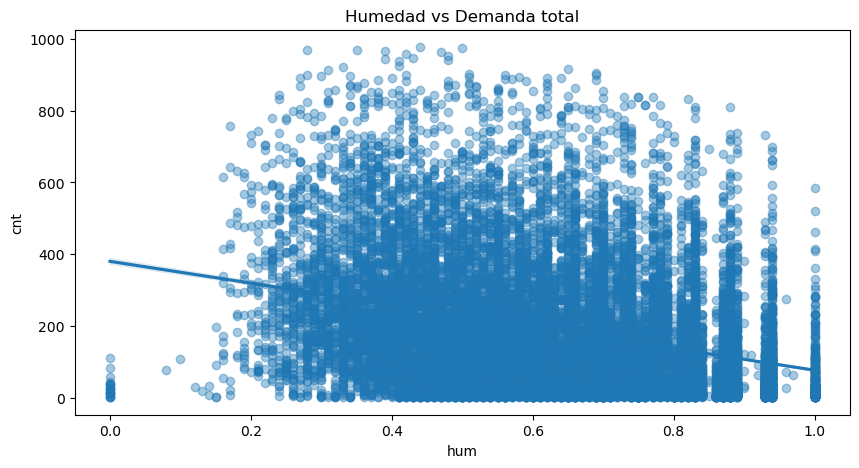

In [23]:
plt.figure(figsize=(10,5))
sns.regplot(data=df, x="hum", y="cnt", scatter_kws={"alpha":0.4})
plt.title("Humedad vs Demanda total")
plt.show()

## 3.5.4 Distribución del uso según el clima

Al realizar el analisis de acuerdo a la clasificación del clima, notamos una correlación negativa:

* Un mayor *weathersit* indica un peor clima, lo que a su vez indica menor uso de bicicletas.

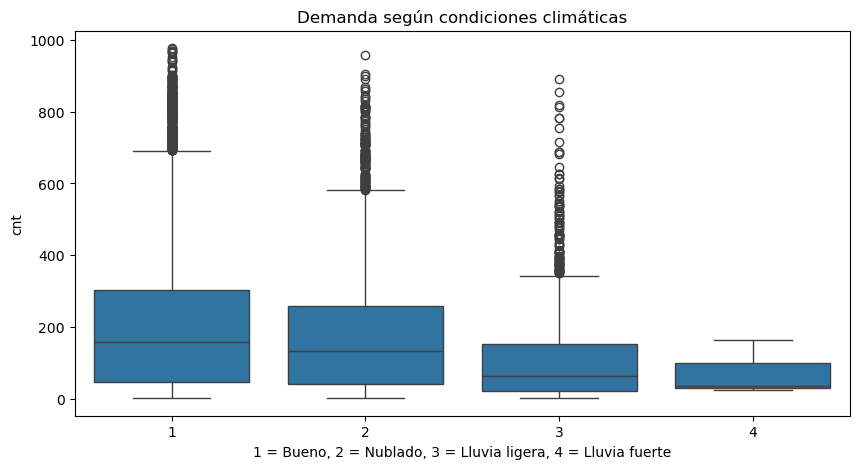

In [24]:
plt.figure(figsize=(10,5))
sns.boxplot(data=df, x="weathersit", y="cnt")
plt.title("Demanda según condiciones climáticas")
plt.xlabel("1 = Bueno, 2 = Nublado, 3 = Lluvia ligera, 4 = Lluvia fuerte")
plt.show()

## 3.5.5 Impacto de la velocidad del viento

La velocidad del viento tiene un impacto menos perceptible que la humedad y la temperatura, aunque se puede evidenciar una ligera correlación positiva.

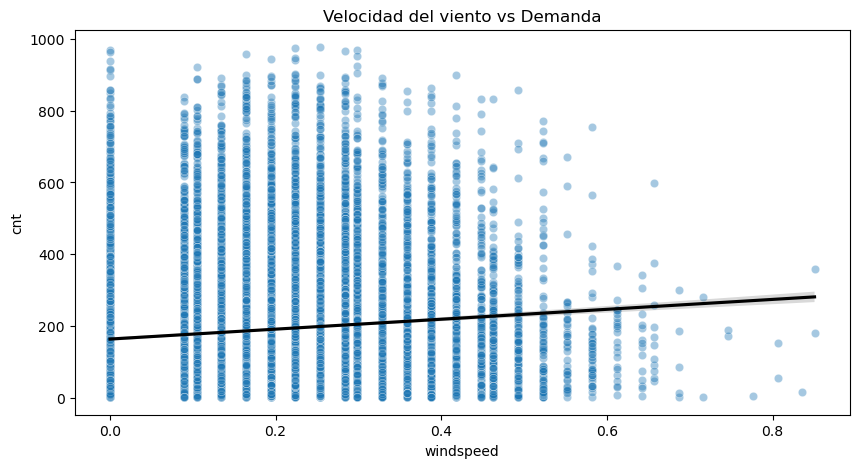

In [25]:
plt.figure(figsize=(10,5))
sns.scatterplot(data=df, x="windspeed", y="cnt", alpha=0.4)
sns.regplot(data=df, x="windspeed", y="cnt", scatter=False, color="black")
plt.title("Velocidad del viento vs Demanda")
plt.show()

## 3.5.6 Comparación entre Casuales vs Registrados

Finalmente, realizamos los gráficos, distinguiendo entre usuarios casuales y registrados, donde se evidencia que el comportamiento entre usuarios registrados y casuales es similar frente a las variables climáticas.

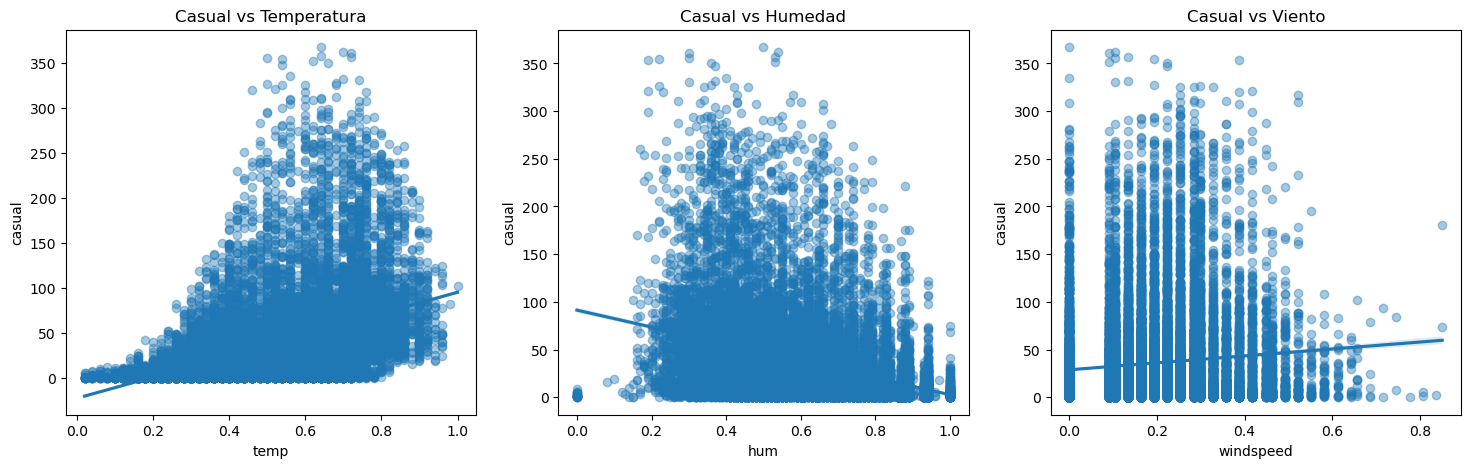

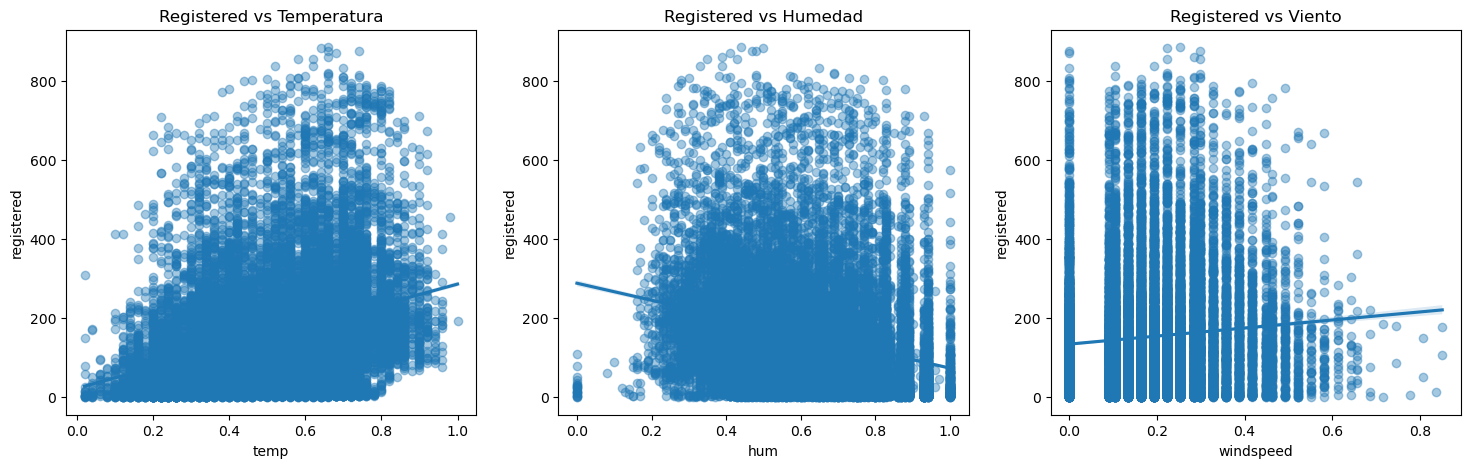

In [26]:
fig, axes = plt.subplots(1, 3, figsize=(18,5))

sns.regplot(data=df, x="temp", y="casual", ax=axes[0], scatter_kws={"alpha":0.4})
axes[0].set_title("Casual vs Temperatura")

sns.regplot(data=df, x="hum", y="casual", ax=axes[1], scatter_kws={"alpha":0.4})
axes[1].set_title("Casual vs Humedad")

sns.regplot(data=df, x="windspeed", y="casual", ax=axes[2], scatter_kws={"alpha":0.4})
axes[2].set_title("Casual vs Viento")

plt.show()


fig, axes = plt.subplots(1, 3, figsize=(18,5))

sns.regplot(data=df, x="temp", y="registered", ax=axes[0], scatter_kws={"alpha":0.4})
axes[0].set_title("Registered vs Temperatura")

sns.regplot(data=df, x="hum", y="registered", ax=axes[1], scatter_kws={"alpha":0.4})
axes[1].set_title("Registered vs Humedad")

sns.regplot(data=df, x="windspeed", y="registered", ax=axes[2], scatter_kws={"alpha":0.4})
axes[2].set_title("Registered vs Viento")

plt.show()


# 3.6 Conclusiones

En las siguientes tablas, se pueden observar un resumen de las conclusiones obtenidas:

## 3.6.1 Análisis de estacionalidad

| Tipo de estacionalidad        | Patrón observado                                                             | Impacto en la demanda          | Interpretación                                                                            |
| ----------------------------- | ---------------------------------------------------------------------------- | ------------------------------ | ----------------------------------------------------------------------------------------- |
| **Horaria**                   | Dos picos marcados: 8 AM y 5–6 PM. Mínimos en madrugada.                     | Alta variación dentro del día. | La demanda sigue rutinas laborales: horas pico de transporte y ocio al final de la tarde. |
| **Diaria (día de la semana)** | Mayor uso jueves–sábado. Menor los lunes.                                    | Moderado.                      | Los fines de semana y días previos aumentan el uso recreativo.                            |
| **Mensual**                   | Crecimiento en primavera–verano; caída fuerte en invierno.                   | Alto impacto.                  | La estacionalidad climática afecta el uso: temperaturas más altas → más demanda.          |
| **Interacción hora × día**    | Fines de semana tienen picos tardíos; días laborales tienen picos laborales. | Importante.                    | Distintos perfiles de uso según día: recreativo vs transporte diario.                     |


## 3.6.2 Análisis Casuales vs Registrados

| Categoría                            | Patrón observado                                                                | Sensibilidad al clima                              | Interpretación                                                     |
| ------------------------------------ | ------------------------------------------------------------------------------- | -------------------------------------------------- | ------------------------------------------------------------------ |
| **Casual**                           | Picos más altos en fines de semana y tardes. Muy influenciados por temperatura. | Muy alta (temp↑ = uso↑, hum↑ = uso↓).              | Usuarios recreativos que dependen de condiciones agradables.       |
| **Registered**                       | Picos claros en horas laborales (8 AM y 5 PM). Patrones diarios consistentes.   | Moderada (usos más estables ante clima).           | Usuarios que usan la bicicleta como transporte habitual.           |
| **Comparación Casual vs Registered** | Los casual aumentan mucho en verano; los registered se mantienen constantes.    | Casual: muy sensibles. Registered: poco sensibles. | La diferencia revela finalidades distintas: ocio vs transporte.    |
| **Reacción a lluvia**                | Casual: caída muy fuerte. Registered: caída, pero menor.                        | Alta diferencia entre grupos.                      | El uso obligatorio (registered) persiste más en malas condiciones. |


## 3.6.3 Análisis climático

| Variable climática                                  | Efecto sobre la demanda                                          | Diferencia entre Casual y Registered                                        | Interpretación                                                                |
| --------------------------------------------------- | ---------------------------------------------------------------- | --------------------------------------------------------------------------- | ----------------------------------------------------------------------------- |
| **Temperatura (temp)**                              | Aumenta fuertemente la demanda.                                  | Casual: muy sensibles; suben mucho con calor. Registered: aumento moderado. | El clima cálido incentiva el uso recreativo; el uso rutinario es más estable. |
| **Humedad (hum)**                                   | Reducción significativa de la demanda.                           | Casual: caída fuerte. Registered: caída moderada.                           | Alta humedad sugiere incomodidad o lluvia próxima.                            |
| **Velocidad del viento (windspeed)**                | Efecto débil; cae solo con viento fuerte.                        | Casual y Registered: impacto leve.                                          | No es un factor decisivo salvo en condiciones extremas.                       |
| **Estado del clima (weathersit)**                   | Clara caída en lluvia (3) y mínima demanda en lluvia fuerte (4). | Casual: reducción drástica. Registered: reducción menos extrema.            | La lluvia es la mayor causa de reducción del uso.                             |


| Estado del clima                 | Efecto en la demanda | Interpretación                    |
| -------------------------------- | -------------------- | --------------------------------- |
| **1 (Bueno / Despejado)**        | Máxima demanda       | Clima óptimo para montar          |
| **2 (Nublado)**                  | Demanda moderada     | Todavía aceptable para uso urbano |
| **3 (Lluvia ligera / Nieve)**    | Caída fuerte         | La mayoría evita montar           |
| **4 (Lluvia fuerte / Tormenta)** | Mínima demanda       | Uso prácticamente inexistente     |
